# icksharing EDA — Исследовательский анализ данныхчф

## 1. Загрузка данных и первичный осмотр

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
df = pd.read_csv('kicksharing.csv')
print('Размер таблицы:', df.shape)
print('Количество дубликатов:', df.duplicated().sum())
df.head()

Размер таблицы: (396749, 20)
Количество дубликатов: 0


,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [218]:
df.isna().mean().sort_values(ascending=False)


loyalty_accrual_bns_amt    0.944680
education_level_cd         0.520959
marital_status_cd          0.451217
lvn_state_nm               0.086143
loyalty_accrual_rub_amt    0.075002
gender_cd                  0.007362
created_dttm               0.000000
nominal_price_rub_amt      0.000000
local_book_start_dttm      0.000000
book_time_zone_cd          0.000000
book_end_dttm              0.000000
book_start_dttm            0.000000
order_rk                   0.000000
distance_km                0.000000
party_rk                   0.000000
hold_amount                0.000000
activation_cost            0.000000
minute_cost                0.000000
age                        0.000000
transport_model            0.000000
dtype: float64

### Выводы

Данных ~400 тыс строк

Дубликатов нет

Некоторые столбцы содержат большое число пропусков

Даты представлены в виде строк

## 2. Анализ числовых признаков
### 2.1. Статистическое описание

In [219]:
# Список числовых признаков
num_cols = ['minute_cost', 'activation_cost', 'hold_amount',
             'distance_km', 'nominal_price_rub_amt',
             'loyalty_accrual_rub_amt', 'age']
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
minute_cost,396749.0,7.288688,1.289492,1.50,6.490000,7.490000,8.220000,19.990000
activation_cost,396749.0,42.593226,11.989974,0.00,30.000000,50.000000,50.000000,50.000000
hold_amount,396749.0,299.983869,1.939153,80.00,300.000000,300.000000,300.000000,500.000000
distance_km,396749.0,3.681031,141.862349,0.00,0.941054,1.729883,3.063694,56012.640308
nominal_price_rub_amt,396749.0,127.647694,100.122365,0.00,80.840000,103.940000,142.100000,5627.640000
loyalty_accrual_rub_amt,366992.0,37.516121,75.208560,-161.94,11.240000,18.730000,35.060000,3185.000000
age,396749.0,31.544006,9.434545,12.00,24.000000,31.000000,37.000000,94.000000


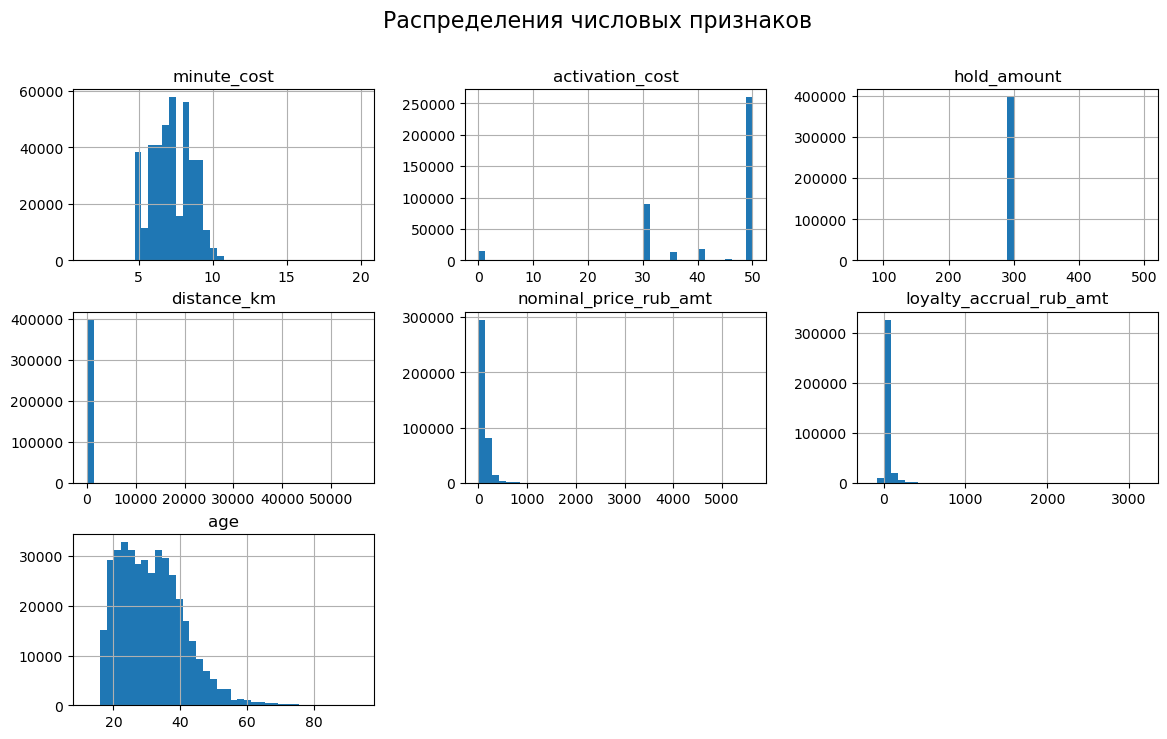

In [220]:
df[num_cols].hist(figsize=(14, 8), bins=40)
plt.suptitle('Распределения числовых признаков', fontsize=16)
plt.show()

### Выводы

minute_cost, activation_cost и hold_amount имеют фиксированные тарифные уровни, что подтверждает нормальность тарифной сетки.

distance_km содержит экстремальные значения до 56 000 км — явно ошибочные GPS-точки.

nominal_price_rub_amt содержит нулевые значения, которые связаны с поездками продолжительностью <1 минуты или с отменами.

Возраст распределён неравномерно: основная аудитория — 18–40 лет.

## 3. Предварительная очистка данных

In [221]:
df = df.drop(columns=['loyalty_accrual_bns_amt', 'hold_amount'])

### Выводы

loyalty_accrual_bns_amt содержит 94% пропусков и не может быть использован в анализе — удалён.

hold_amount — фиксированный залог, не несущий аналитической ценности — удалён.

## 4. Категориальные признаки
### 4.1. Частоты

In [222]:
cat_cols = ['gender_cd', 'education_level_cd', 'marital_status_cd', 
            'lvn_state_nm', 'transport_model']
for col in cat_cols:
    print(f'\n--- {col} ---')
    print(df[col].value_counts(dropna=False).head(10))
    print('Доля пропусков:', df[col].isna().mean().round(3))


--- gender_cd ---
gender_cd
M      335458
F       58370
NaN      2921
Name: count, dtype: int64
Доля пропусков: 0.007

--- education_level_cd ---
education_level_cd
NaN    206690
GRD     94341
SCH     51273
UGR     38896
PGR      4224
ACD      1325
Name: count, dtype: int64
Доля пропусков: 0.521

--- marital_status_cd ---
marital_status_cd
NaN    179020
UNM    116094
MAR     74061
CIV     15036
DIV     11820
WID       718
Name: count, dtype: int64
Доля пропусков: 0.451

--- lvn_state_nm ---
lvn_state_nm
Г МОСКВА              90897
МОСКОВСКАЯ ОБЛ        40440
Г САНКТ-ПЕТЕРБУРГ     36867
NaN                   34177
СВЕРДЛОВСКАЯ ОБЛ      28952
КРАСНОДАРСКИЙ КРАЙ    16533
РЕСП ТАТАРСТАН         9499
РЕСП БАШКОРТОСТАН      8377
НИЖЕГОРОДСКАЯ ОБЛ      7758
НОВОСИБИРСКАЯ ОБЛ      7158
Name: count, dtype: int64
Доля пропусков: 0.086

--- transport_model ---
transport_model
SL              241247
Max              70301
E                67666
Urban E-Bike      4704
ES400             4152
ES200 

### 4.2. Графики категориальных признаков

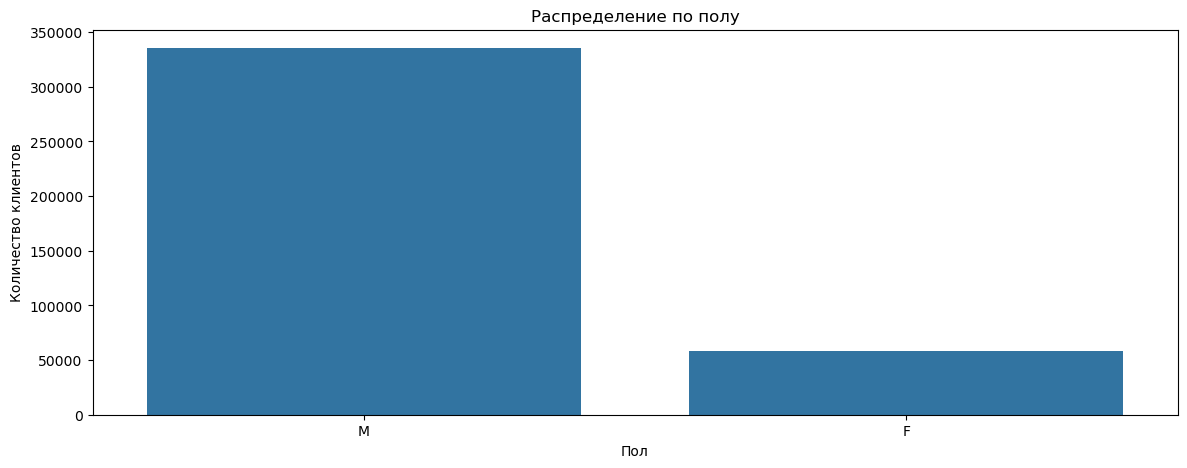

In [223]:
plt.figure(figsize=(14, 5))
sns.countplot(data=df, x='gender_cd', order=df['gender_cd'].value_counts().index)
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.show()



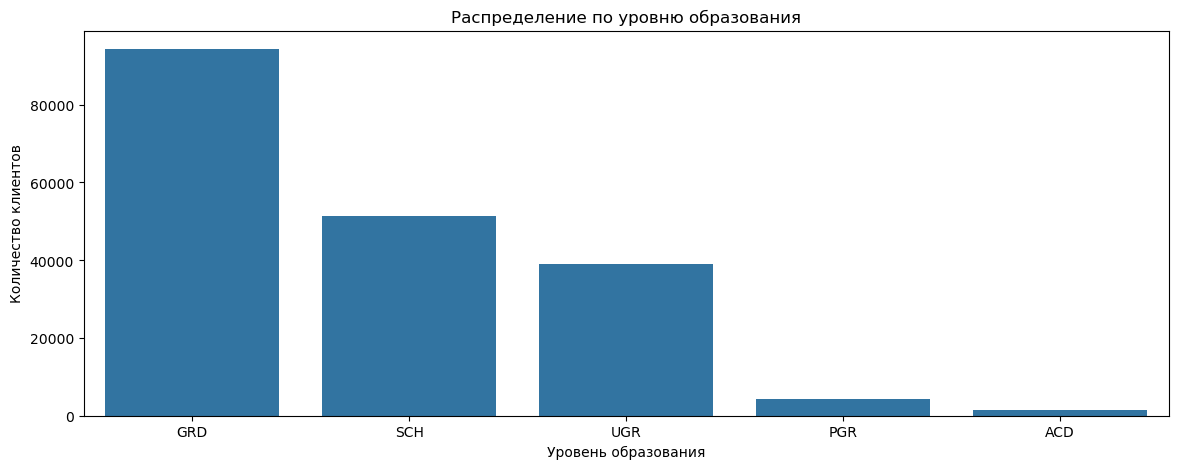

In [224]:
plt.figure(figsize=(14, 5))
sns.countplot(data=df, x='education_level_cd', order=df['education_level_cd'].value_counts().index)
plt.title('Распределение по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество клиентов')
plt.show()



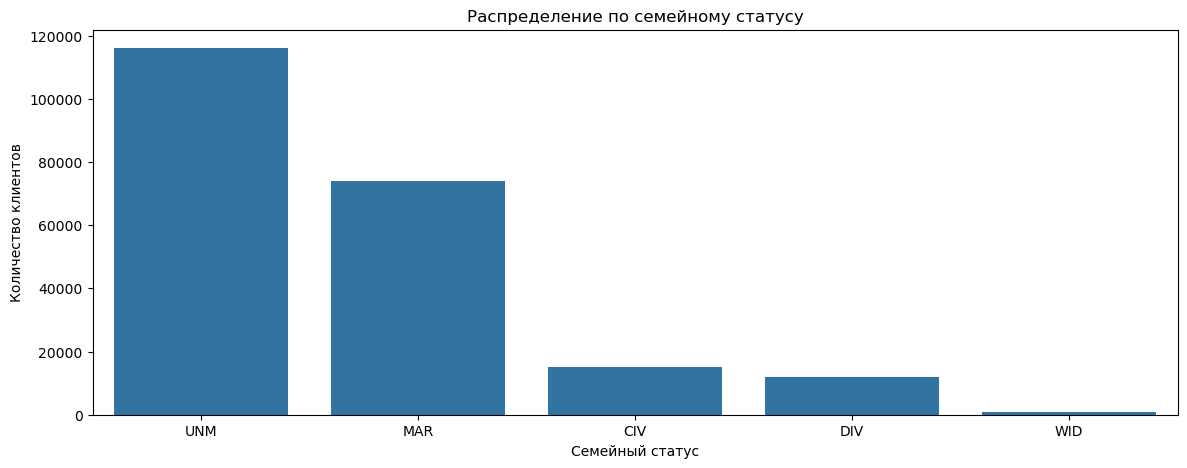

In [225]:
plt.figure(figsize=(14, 5))
sns.countplot(data=df, x='marital_status_cd', order=df['marital_status_cd'].value_counts().index)
plt.title('Распределение по семейному статусу')
plt.xlabel('Семейный статус')
plt.ylabel('Количество клиентов')
plt.show()



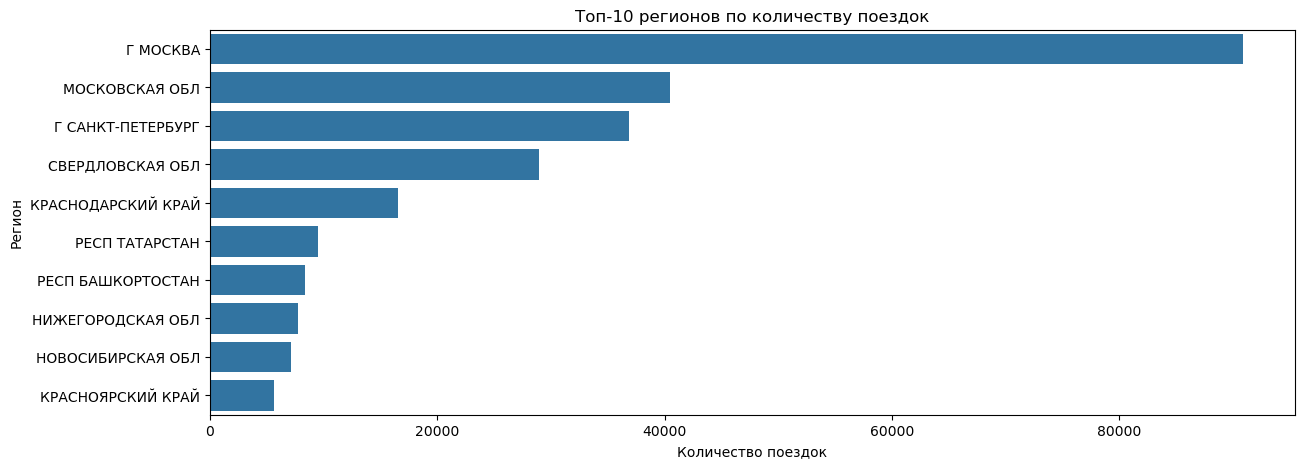

In [226]:
plt.figure(figsize=(14, 5))
top_regions = df['lvn_state_nm'].value_counts().head(10).index
sns.countplot(data=df[df['lvn_state_nm'].isin(top_regions)], 
              y='lvn_state_nm', 
              order=top_regions)
plt.title('Топ-10 регионов по количеству поездок')
plt.xlabel('Количество поездок')
plt.ylabel('Регион')
plt.show()



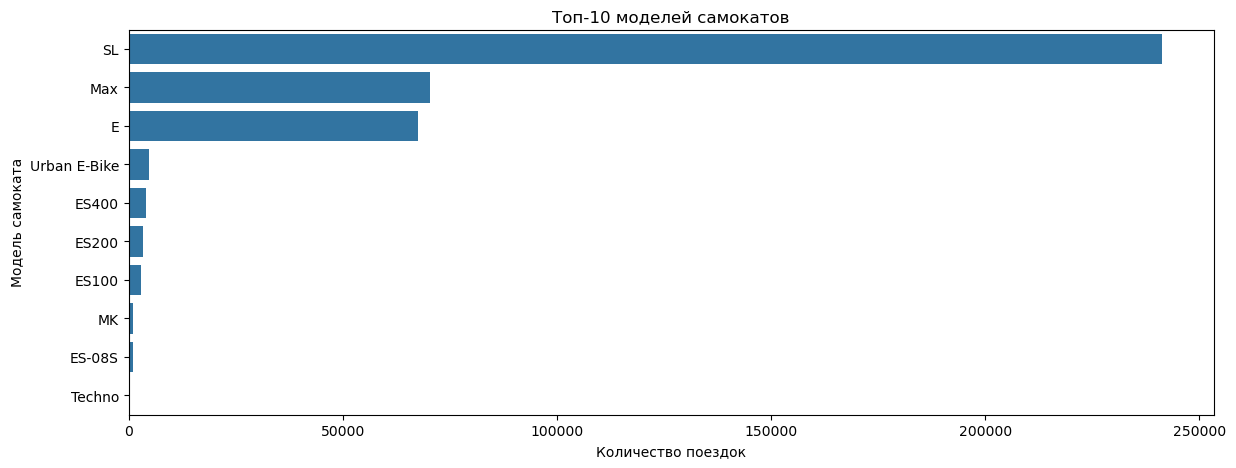

In [227]:
plt.figure(figsize=(14, 5))
top_models = df['transport_model'].value_counts().head(10).index
sns.countplot(data=df[df['transport_model'].isin(top_models)], 
              y='transport_model', 
              order=top_models)
plt.title('Топ-10 моделей самокатов')
plt.xlabel('Количество поездок')
plt.ylabel('Модель самоката')
plt.show()

### Выводы

Пол

- Пользователи — в основном мужчины (84%).

- Доля пропусков минимальна (0.7%).

Образование

- Уровень образования указан только у половины клиентов.

- Среди указанных преобладают: высшее (GRD) и среднее (SCH).

Семейный статус

- Присутствует у ~55% пользователей.

- Лидирующие статусы — UNM (холост/не замужем) и MAR (женат/замужем).

Регионы

- Основные регионы использования: Москва, МО, Санкт-Петербург.

- Пропусков по региону ~9%.

Модели самокатов

- Три ключевые модели: SL, Max, E — обеспечивают ~95% всех поездок.

## 5. Длительность поездок
### 5.1. Преобразование дат

In [228]:
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])
df['book_end_dttm'] = pd.to_datetime(df['book_end_dttm'])
df['local_book_start_dttm'] = pd.to_datetime(df['local_book_start_dttm'])

### 5.2. Расчёт длительности

In [229]:
df['duration_min'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60

### 5.3. Распределение длительности

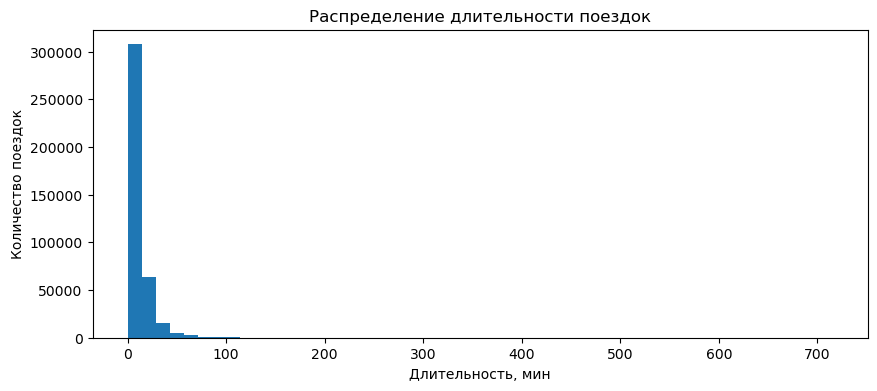

In [230]:
plt.figure(figsize=(10,4))
plt.hist(df['duration_min'], bins=50)
plt.title('Распределение длительности поездок')
plt.xlabel('Длительность, мин')
plt.ylabel('Количество поездок')
plt.show()

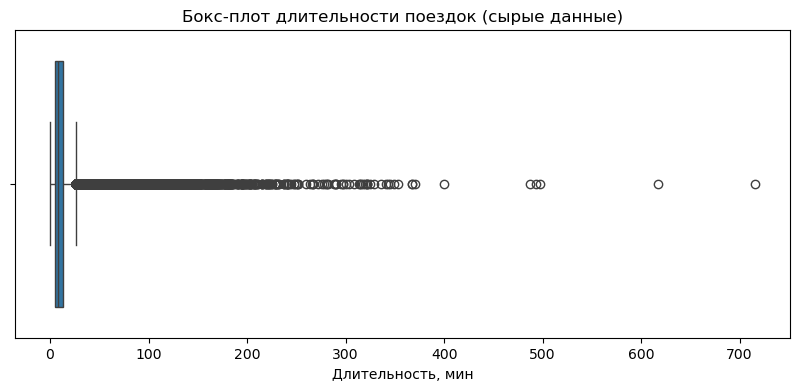

In [231]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['duration_min'])
plt.title('Бокс-плот длительности поездок (сырые данные)')
plt.xlabel('Длительность, мин')
plt.show()


In [232]:
df['duration_min'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99])


count    396749.000000
mean         11.440989
std          13.174834
min           0.033400
1%            0.650279
5%            1.963396
50%           7.768650
95%          32.072975
99%          64.193356
max         715.172206
Name: duration_min, dtype: float64

In [233]:
print("Поездки длительностью > 180 мин:", (df['duration_min'] > 180).sum())
print("Поездки длительностью <= 0:", (df['duration_min'] <= 0).sum())


Поездки длительностью > 180 мин: 160
Поездки длительностью <= 0: 0


### Выводы

1. Основная масса поездок очень короткая:

- медиана ≈ 7.8 мин,

- 95-й перцентиль — 32 мин,

- 99-й — 64 мин.

То есть ~99% всех поездок длятся до часа.

2. Есть редкие экстремальные значения:

- максимум ≈ 715 минут (почти 12 часов),

- только 160 поездок (≈0.04%) превышают 180 минут.

Эти значения находятся далеко за пределами нормального поведения и подтверждаются на графиках (хвост до 700+ минут).

3. Нулевых и отрицательных длительностей нет
(что характерно для случаев, когда timestamps регистрируются в неверном порядке — у нас это не выявлено).

4. Графики показывают сильную правостороннюю асимметрию, типичную для прокатных сервисов:
много коротких поездок и длинный "хвост" редких, но экстремальных значений.

### 5.4. Какие значения считаем аномальными

Основано строго на наблюдаемых данных:

- Поездки > 180 мин — всего 160 штук, визуально выбиваются на всех графиках.

- duration_min <= 0 — отсутствуют, поэтому ничего не удаляем.

## 6. Анализ аномалий

После расчёта длительности поездок необходимо выявить и удалить записи, которые противоречат реальному поведению пользователей или отражают технические ошибки трекинга.

### 6.1. Критерии аномалий

Аномальными считаем следующие случаи:

- duration_min ≤ 0
– ошибки в метках времени.

- duration_min < 1 мин и nominal_price_rub_amt = 0
– пользователь активировал самокат, но фактически не поехал.
Корректная ситуация, но мешает анализу длительности/стоимости.

- duration_min > 180 мин (3 часа)
– малореалистично для кикшеринга, чаще всего ошибки трекинга.

- distance_km > 50 км
– GPS-аномалии (длинные прыжки координат).

In [234]:
# Аномалии длительности и расстояния
anomalies = df[
    (df['duration_min'] <= 0) |
    ((df['duration_min'] < 1) & (df['nominal_price_rub_amt'] == 0)) |
    (df['duration_min'] > 180) |
    (df['distance_km'] > 50)
]

print("Количество аномалий:", len(anomalies))
anomalies.head()

Количество аномалий: 7339


,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,duration_min
5,277397094,5247768,M,42,NaN,NaN,МОСКВА,7.49,50.0,SL,0.01609,2024-09-10 09:40:18.000000,2024-09-10 09:40:24.036000,2024-09-10 09:41:03.644495,3,2024-09-10 09:40:24.036000,0.0,NaN,0.660142
26,266071242,313414522,M,24,UGR,UNM,ИРКУТСКАЯ ОБЛ,8.99,30.0,SL,0.00000,2024-08-07 11:45:22.000000,2024-08-07 11:45:26.077578,2024-08-07 11:46:10.893866,8,2024-08-07 16:45:26.077578,0.0,NaN,0.746938
57,264798748,32477259,M,33,GRD,UNM,Г МОСКВА,6.99,50.0,E,0.00000,2024-08-02 08:34:34.000000,2024-08-02 08:34:38.057711,2024-08-02 08:35:14.438970,3,2024-08-02 08:34:38.057711,0.0,NaN,0.606354
86,262311343,275000831,F,35,GRD,MAR,БЕЛГОРОДСКАЯ ОБЛ,6.99,50.0,E,0.00000,2024-07-24 19:17:19.000000,2024-07-24 19:17:23.568347,2024-07-24 19:17:50.785998,3,2024-07-24 19:17:23.568347,0.0,NaN,0.453628
144,270153833,744409018,M,40,GRD,CIV,НИЖЕГОРОДСКАЯ ОБЛ,4.99,50.0,E,0.00000,2024-08-22 12:25:03.000000,2024-08-22 12:25:08.041864,2024-08-22 12:25:27.495422,3,2024-08-22 12:25:08.041864,0.0,NaN,0.324226


### 6.3. Очистка данных

In [235]:
df = df[
    (df['duration_min'] > 0) &
    (df['duration_min'] < 180) &
    (df['distance_km'] <= 50)
]

### Выводы

- Основные аномалии связаны с техническими сбоями: GPS-скачки и некорректные отметки времени.

- Часть записей соответствует коротким «ложным» активациям (duration < 1 мин при цене 0 руб).

- После очистки датасет лучше отражает реальные поездки пользователей и подходит для анализа сезонности, расстояний и стоимости.

## 7. Сезонность и временные паттерны
### 7.1. Извлечение компонентов даты

In [236]:
df['month'] = df['local_book_start_dttm'].dt.month_name()
df['day_of_week'] = df['local_book_start_dttm'].dt.day_name()
df['hour'] = df['local_book_start_dttm'].dt.hour

### 7.2. Графики сезонности

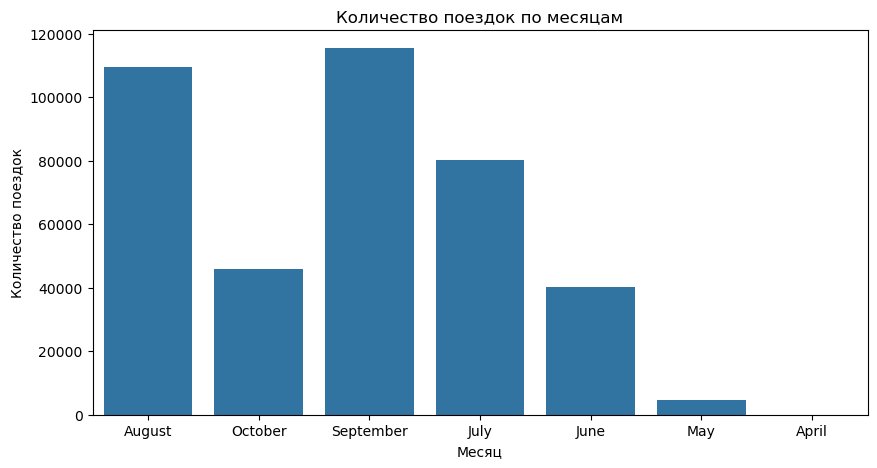

In [237]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='month')
plt.title('Количество поездок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество поездок')
plt.show()


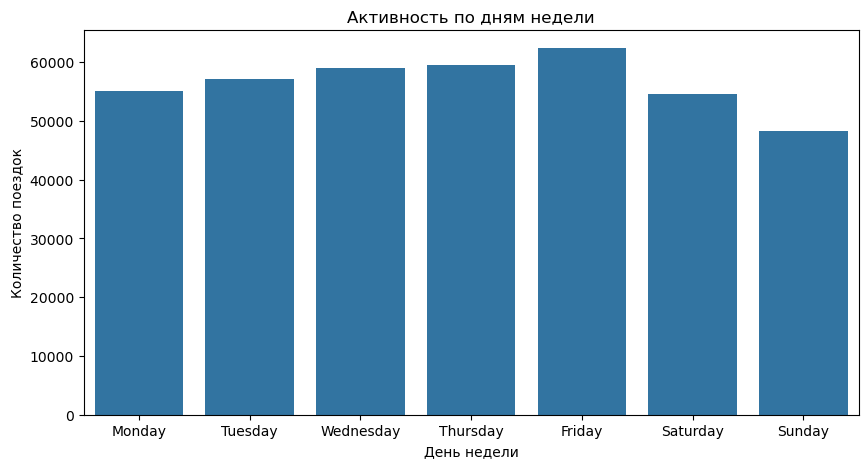

In [238]:
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day_of_week', order=order_days)
plt.title('Активность по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.show()


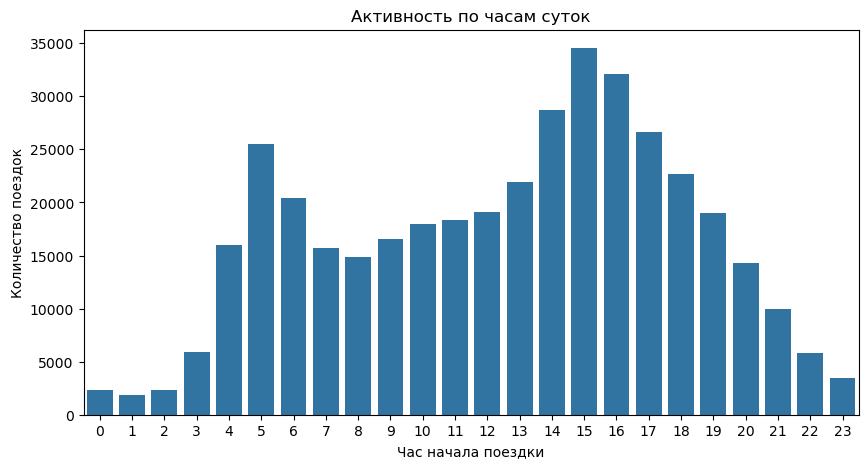

In [239]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='hour')
plt.title('Активность по часам суток')
plt.xlabel('Час начала поездки')
plt.ylabel('Количество поездок')
plt.show()


### Выводы

Месяцы

- Пик использования — июль–сентябрь, что соответствует сезону аренды.

- Резкий спад — май и октябрь.

Дни недели

- Активность плавно растёт к пятнице.

- На выходных — небольшое снижение.

Часы суток

- Пиковые часы: 15:00–18:00.

- Минимум активности ночью (0:00–5:00).

- Утренний рост начинается с 6:00.

## 8. Поведение пользователей по группам
### Средняя стоимость и длительность по полу

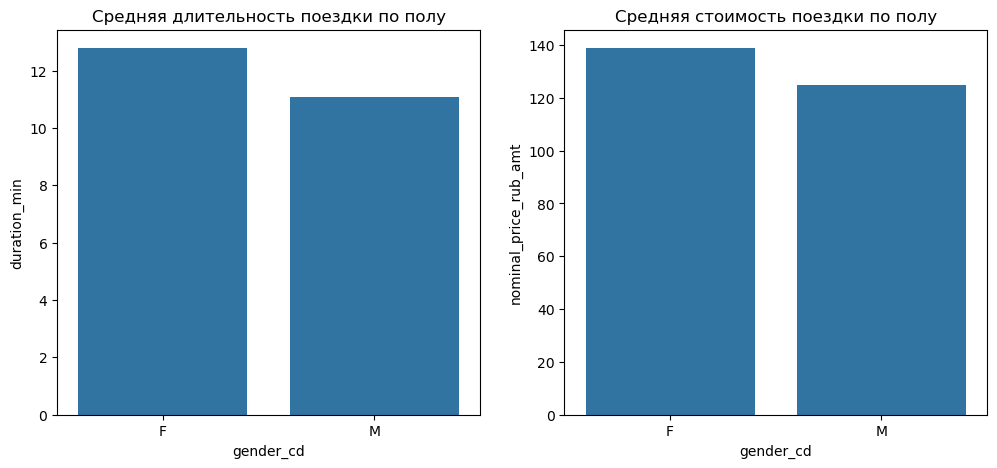

In [240]:
agg_gender = df.groupby('gender_cd')[['duration_min', 'nominal_price_rub_amt']].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=agg_gender, x='gender_cd', y='duration_min', ax=ax[0])
ax[0].set_title('Средняя длительность поездки по полу')
sns.barplot(data=agg_gender, x='gender_cd', y='nominal_price_rub_amt', ax=ax[1])
ax[1].set_title('Средняя стоимость поездки по полу')
plt.show()


### Выводы

Женщины в среднем совершают более длинные поездки (+15%), мужчины — более короткие.

Стоимость поездок у женщин также выше, что коррелирует с большей длительностью.

## 9. Корреляционный анализ

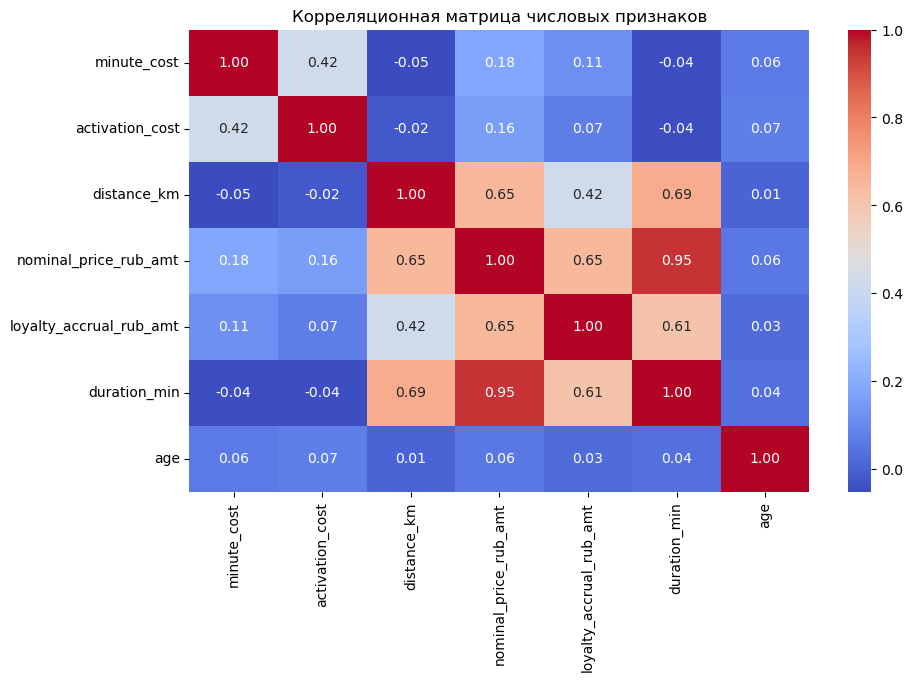

In [241]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['minute_cost', 'activation_cost', 
                'distance_km', 'nominal_price_rub_amt', 
                'loyalty_accrual_rub_amt', 'duration_min', 'age']]
            .corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица числовых признаков')
plt.show()


### Выводы

Сильные связи:

- duration_min — nominal_price_rub_amt (0.95)

- distance_km — duration_min (0.69)

Стоимость формируется главным образом длительностью поездки.

Возраст слабо коррелирует с любыми метриками.

## 10. Взаимосвязи ключевых признаков

### Стоимость vs длительность

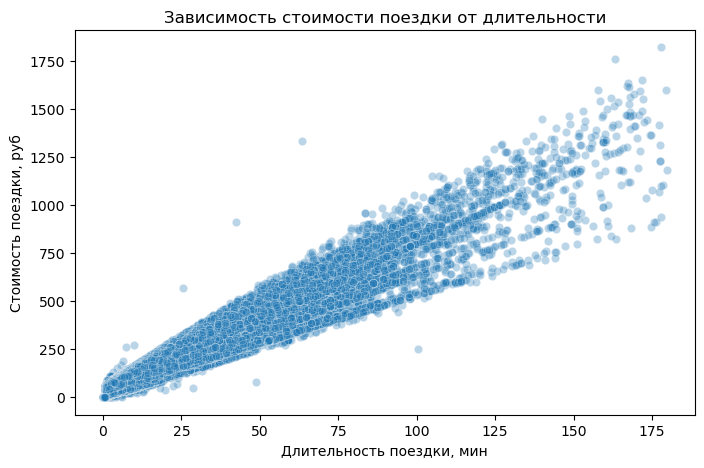

In [242]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='duration_min', y='nominal_price_rub_amt', alpha=0.3
)
plt.title('Зависимость стоимости поездки от длительности')
plt.xlabel('Длительность поездки, мин')
plt.ylabel('Стоимость поездки, руб')
plt.show()


### Расстояние vs длительность

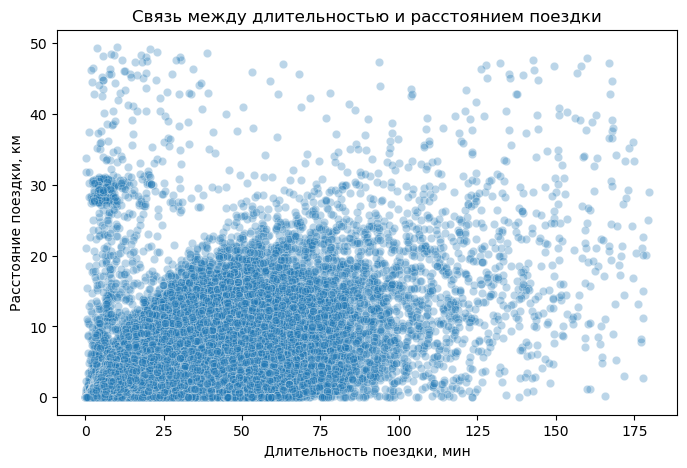

In [243]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='duration_min', y='distance_km', alpha=0.3
)
plt.title('Связь между длительностью и расстоянием поездки')
plt.xlabel('Длительность поездки, мин')
plt.ylabel('Расстояние поездки, км')
plt.show()

### Выводы

Между длительностью и стоимостью существует почти линейная зависимость: чем дольше поездка, тем выше стоимость. Структура тарифа подтверждается визуально.

Расстояние также растёт вместе с длительностью, однако зависимость менее точная, что объясняется разной скоростью передвижения и особенностями маршрутов.

На графике заметны редкие технические выбросы (точки далеко от основного облака), которые были удалены ранее в процессе обработки аномалий.

## 11. Региональный анализ

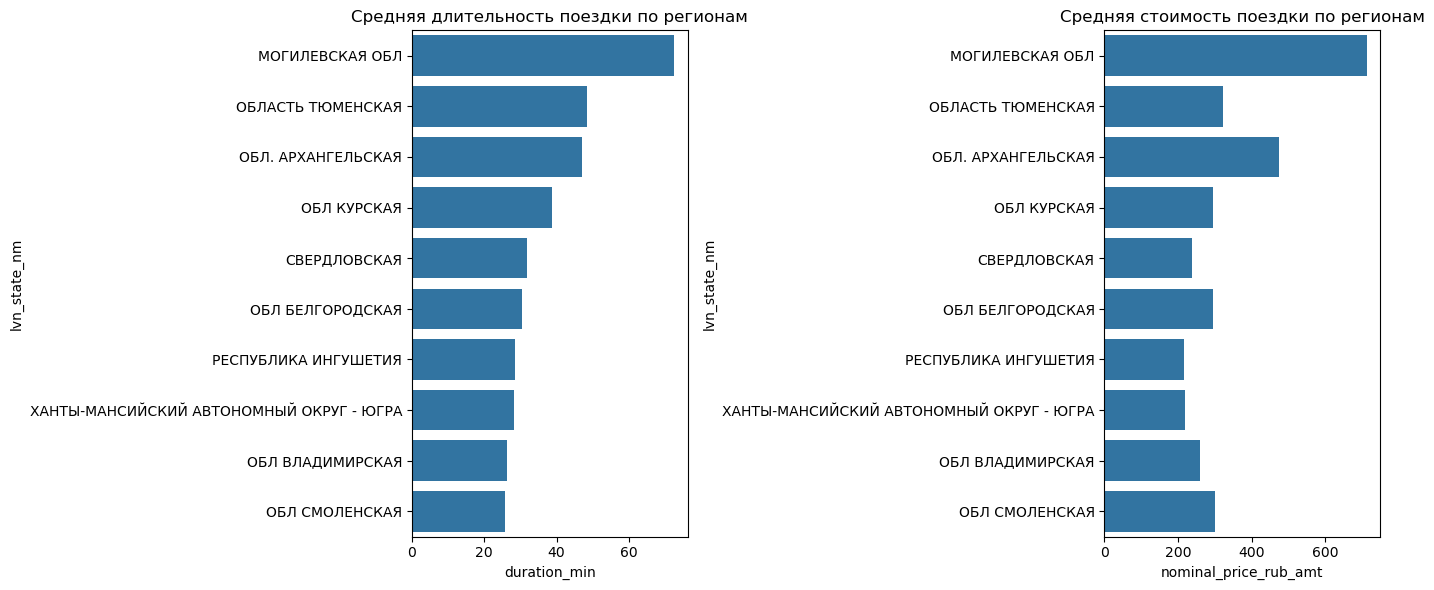

In [244]:
region_stats = (
    df.groupby('lvn_state_nm')[['duration_min', 'nominal_price_rub_amt']]
    .mean()
    .sort_values('duration_min', ascending=False)
    .head(10)
)

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(x=region_stats['duration_min'], y=region_stats.index, ax=ax[0])
ax[0].set_title('Средняя длительность поездки по регионам')
sns.barplot(x=region_stats['nominal_price_rub_amt'], y=region_stats.index, ax=ax[1])
ax[1].set_title('Средняя стоимость поездки по регионам')
plt.tight_layout()
plt.show()

### Выводы

- Все регионы в топ-10 показывают согласованную картину: чем выше средняя длительность поездки, тем выше её средняя стоимость.

- Могилёвская, Тюменская и Архангельская области выделяются наиболее длинными и дорогими поездками — вероятно, из-за специфики инфраструктуры и средних расстояний между точками проката.

- Нижняя часть рейтинга (Смоленская, Владимирская области) демонстрирует более короткие и дешёвые поездки.

- Разброс значений существенный: средняя длительность варьируется от ~23 до 70 минут, стоимость — от ~230 до 700 рублей, что подчёркивает выраженные региональные различия.

## Итоговые выводы по исследованию

### 1. Структура и качество данных
- Датасет содержит около **400 тыс. записей**, дубликаты отсутствуют.
- Наибольшее количество пропусков — в категориальных признаках: образование, семейный статус, регион.
- Столбцы `loyalty_accrual_bns_amt` (94% пропусков) и `hold_amount` (фиксированный залог) удалены как неинформативные.

---

### 2. Числовые признаки и длительность поездок
- Большинство поездок — короткие: медиана ≈ **7.8 мин**, 95-й перцентиль — **32 мин**, 99-й — **64 мин**.
- Распределение длительности выраженно правостороннее: большое число коротких поездок и длинный хвост редких длинных поездок.
- Встречаются экстремальные значения до **700+ минут**, что существенно выходит за пределы основного распределения.

---

### 3. Обнаруженные аномалии
- **Поездки > 180 минут** (≈0.04% данных) признаны техническими выбросами.
- **duration_min < 1 мин при цене 0 руб** — ложные активации (не ошибки, но нерепрезентативны для анализа стоимости).
- **distance_km > 50 км** — GPS-аномалии (скачки координат).
- После очистки датасет стал более стабильным и отражает реальные поездки пользователей.

---

### 4. Категориальные признаки
- Основная аудитория — мужчины (84%), возраст преимущественно **18–40 лет**.
- Наиболее популярные модели самокатов — **SL, Max, E**, на которые приходится около 95% всех поездок.
- Топ-регионы по числу поездок: **Москва, Московская область, Санкт-Петербург**.

---

### 5. Временные закономерности
- Чёткая сезонность: пик использования — **июль–сентябрь**, спад — **май–октябрь**.
- Поведение по дням недели: плавный рост к пятнице и небольшое снижение в выходные.
- Активность по часам суток: максимум — **15:00–18:00**, минимум — **0:00–5:00**.

---

### 6. Связи между ключевыми признаками
- Стоимость поездки почти полностью объясняется длительностью (корреляция **0.95**).
- Расстояние также растёт с длительностью (корреляция **0.69**), но менее линейно.
- Возраст пользователя практически не влияет на длительность, стоимость и дистанцию поездки.

---

### 7. Региональные различия
- Регионы с более длинными поездками имеют более высокую среднюю стоимость.
- Лидеры по длительности и стоимости: **Могилёвская, Тюменская, Архангельская области**.
- Более короткие и дешёвые поездки характерны для **Смоленской и Владимирской областей**.
- Значения существенно варьируются: длительность от ~23 до ~70 минут, стоимость от ~230 до ~700 рублей.

---

### Общий итог
Исследование показывает типичную для кикшеринга картину: преобладание коротких поездок, ярко выраженную сезонность, различия по регионам и сильную зависимость стоимости от длительности.  
Очистка данных от аномалий позволила получить более точное представление о поведении пользователей и подготовила датасет к дальнейшему анализу, моделированию и формированию гипотез.
